In [1]:
from final_zillow_functions import (find_model_scores, scale_zillow, find_baseline,
                                    train_val_test, explore_num_features,
                                    explore_bathrooms, explore_bedrooms, explore_sqft,
                                    explore_relationships, check_p_val, train_validate,
                                    wrangle_zillow, q1_stats_test, q2_stats_test,
                                    q3_stats_test, q4_stats_test, final_test)

#Sklearn
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import normaltest, kstest, norm
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from acquire import wrangle_zillow, train_validate, check_p_val, explore_relationships

In [2]:
#Sets options to show more stuff
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200

In [3]:
df = wrangle_zillow()

In [4]:
train, val, test = train_validate(df)

In [5]:
data_dic = pd.read_excel('zillow_data_dictionary.xlsx')

In [6]:
data_dic.iloc[[3, 4, 8, 11, 17, 21, 23, 25, 26, 30, 51]]

,Feature,Description
3,'bathroomcnt',Number of bathrooms in home including fractional bathrooms
4,'bedroomcnt',Number of bedrooms in home
8,'decktypeid',Type of deck (if any) present on parcel
11,'calculatedfinishedsquarefeet',Calculated total finished living area of the home
17,'fips',Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details
21,'garagecarcnt',Total number of garages on the lot including an attached garage
23,'hashottuborspa',Does the home have a hot tub or spa
25,'latitude',Latitude of the middle of the parcel multiplied by 10e6
26,'longitude',Longitude of the middle of the parcel multiplied by 10e6
30,'poolcnt',Number of pools on the lot (if any)


In [7]:
"""
This beast of a visualization show the sales per month for homes in each percentile range.
"""
#Sets the values for variables
metrics = []
top_cutoff = train['tax_value'].quantile(q=.75)
bottom_cutoff = train['tax_value'].quantile(q=.25)

In [8]:
#Builds the dataframes for each percentile
top_sellers = train[train['tax_value'] >= top_cutoff]
mid_sellers = train[(train['tax_value'] >= bottom_cutoff) & (train['tax_value'] < top_cutoff)]
bottom_sellers = train[train['tax_value'] <= bottom_cutoff]

In [9]:
#Grabs the count of houses sold in the bottom 25%
num_items = bottom_sellers.transactiondate.dt.month.unique()
num_items.sort()
for item in num_items:
    temp_df = bottom_sellers[bottom_sellers.transactiondate.dt.month == item]['tax_value'].describe()
    temp_metrics = {
        'month': item,
        'count' : round(temp_df[0],0)}
    metrics.append(temp_metrics)

bottom_sale_date_df = pd.DataFrame(metrics)

In [13]:
bottom_sale_date_df

,month,count
0,1,617.0
1,2,602.0
2,3,912.0
3,4,799.0
4,5,956.0
5,6,1028.0
6,7,799.0
7,8,880.0
8,9,433.0


In [10]:
#Grabs the count of houses sold in the middle 50%
num_items = mid_sellers.transactiondate.dt.month.unique()
num_items.sort()
for item in num_items:
    temp_df = mid_sellers[mid_sellers.transactiondate.dt.month == item]['tax_value'].describe()
    temp_metrics = {
        'month': item,
        'count' : round(temp_df[0],0)}
    metrics.append(temp_metrics)

mid_sale_date_df = pd.DataFrame(metrics)

In [14]:
bottom_sale_date_df

,month,count
0,1,617.0
1,2,602.0
2,3,912.0
3,4,799.0
4,5,956.0
5,6,1028.0
6,7,799.0
7,8,880.0
8,9,433.0


In [11]:
#Grabs the count of houses sold in the top 25%
num_items = top_sellers.transactiondate.dt.month.unique()
num_items.sort()
for item in num_items:
    temp_df = top_sellers[top_sellers.transactiondate.dt.month == item]['tax_value'].describe()
    temp_metrics = {
        'month': item,
        'count' : round(temp_df[0],0)}
    metrics.append(temp_metrics)

top_sale_date_df = pd.DataFrame(metrics)

In [15]:
bottom_sale_date_df

,month,count
0,1,617.0
1,2,602.0
2,3,912.0
3,4,799.0
4,5,956.0
5,6,1028.0
6,7,799.0
7,8,880.0
8,9,433.0


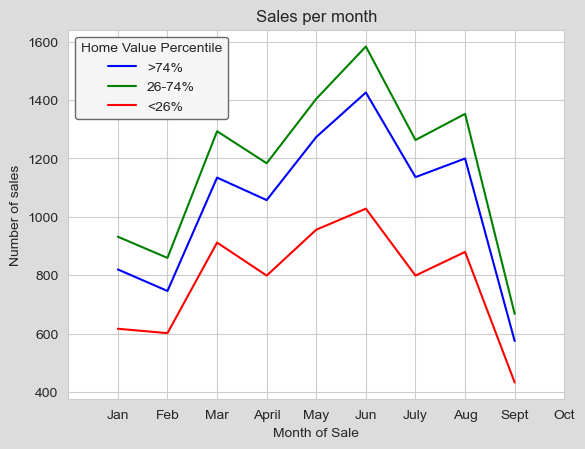

In [16]:
#Plots the data...finally
fig, ax = plt.subplots(facecolor='gainsboro', edgecolor='dimgray')
sns.set_style('whitegrid', rc={'figure.facecolor':'gainsboro'})
sns.lineplot(ax=ax, data=top_sale_date_df, x='month', y='count', color='blue', label='>74%', ci=None).set(title="Sales per month")
sns.lineplot(ax=ax, data=mid_sale_date_df, x='month', y='count', color='green',label='26-74%', ci=None)
sns.lineplot(ax=ax, data=bottom_sale_date_df, x='month', y='count', color='red', label='<26%', ci=None)
plt.xlim(left=0, right =3)
plt.ylabel('Number of sales')
plt.xlabel('Month of Sale')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],['Jan','Feb','Mar', 'April', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct'])
plt.legend(title="Home Value Percentile", framealpha=1, facecolor="whitesmoke", edgecolor='dimgray')

plt.show()